In [30]:
from Sharq import *
from Utilities import create_single_rules_set, is_score_function

1. Load Adults income dataset

In [31]:
adult = pd.read_csv('Datasets/adult.csv')
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


2. Use a utility function from Utilities and create a single rules set for adults income dataset with some default parameters (e.g support threshold=0.05, score function=IS score function, dataset sample = 10000 etc.)


In [32]:
adults_rules_set = create_single_rules_set(adult, binning=True, score_func=is_score_function, support_threshold=0.05, lift_threshold=0.05)

In [33]:
adults_rules_set

,lhs,rhs,support,lift,score
0,"['age_(0, 25]']","['educational-num_(8, 12]']",0.124867,1.121001,0.374134
1,"['age_(0, 25]']",['income_<=50K'],0.178640,1.315100,0.484695
2,['relationship_Own-child'],"['age_(0, 25]']",0.096068,3.628478,0.590407
3,"['age_(0, 25]']",['relationship_Own-child'],0.096068,3.628478,0.590407
4,"['age_(0, 25]']",['workclass_Private'],0.159086,1.195975,0.436191
...,...,...,...,...,...
71385,"['educational-num_(8, 12]', 'gender_Male', 'income_<=50K', 'relationship_Husband', 'workclass_Private']","['hours-per-week_(20, 40]', 'native-country_United-States', 'race_White']",0.054091,1.148301,0.249225
71386,"['hours-per-week_(20, 40]', 'income_<=50K', 'relationship_Husband', 'workclass_Private']","['educational-num_(8, 12]', 'gender_Male', 'native-country_United-States', 'race_White']",0.054091,1.576701,0.292038
71387,"['educational-num_(8, 12]', 'income_<=50K', 'relationship_Husband', 'workclass_Private']","['gender_Male', 'hours-per-week_(20, 40]', 'native-country_United-States', 'race_White']",0.054091,1.725253,0.305485
71388,"['educational-num_(8, 12]', 'hours-per-week_(20, 40]', 'relationship_Husband', 'workclass_Private']","['gender_Male', 'income_<=50K', 'native-country_United-States', 'race_White']",0.054091,1.467084,0.281703


3. Create SHARQ class instance with the Adults Income rules set we mined and run sequential SHARQ* algorithm

In [34]:
sharq = Sharq(rules_set=adults_rules_set)

4. Get SHARQ results of the top and bottom 5 elements with a frequency threshold of 2%

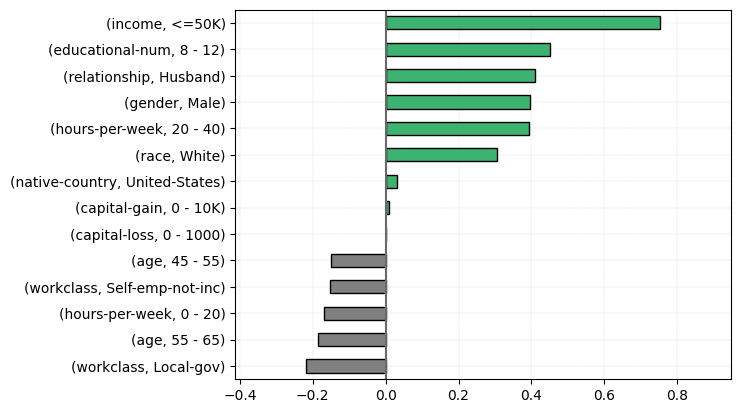

In [35]:
sharq.plt.element_bars(top_bottom_elements_num=5)

5. Get extended SHARQ results of the top and bottom 5 elements with a frequency threshold of 2% and the elements statistics within the rules set

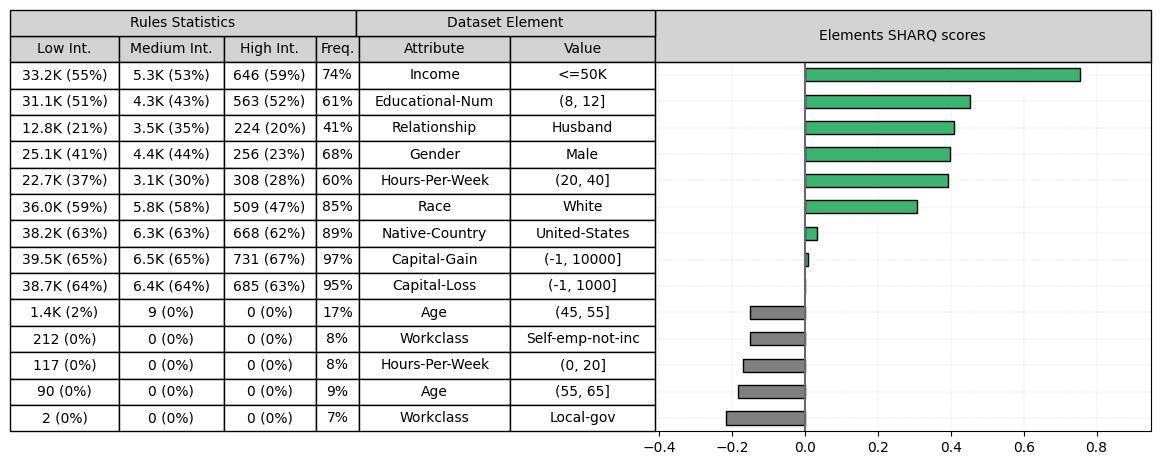

In [36]:
sharq.plt.element_bars(top_bottom_elements_num=5, verbose=True)

6. Calculate and visualize the A-SHARQ score for each attribute (the mean normalized SHARQ
score for the elements of attribute 𝑎 that appear in at least one rule)

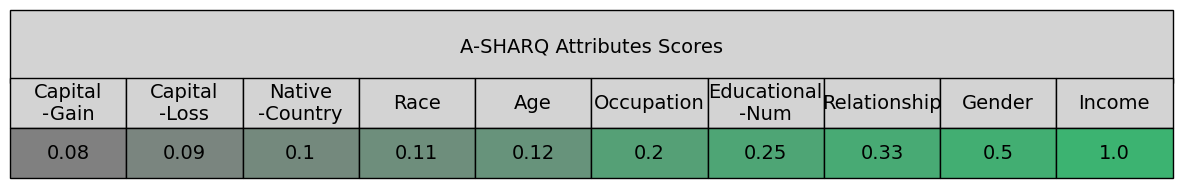

In [37]:
sharq.plt.attributes_heaetmap()

7. Visualize the elements normalized SHARQ score. Green is for high normalized SHARQ score and grey for a low one

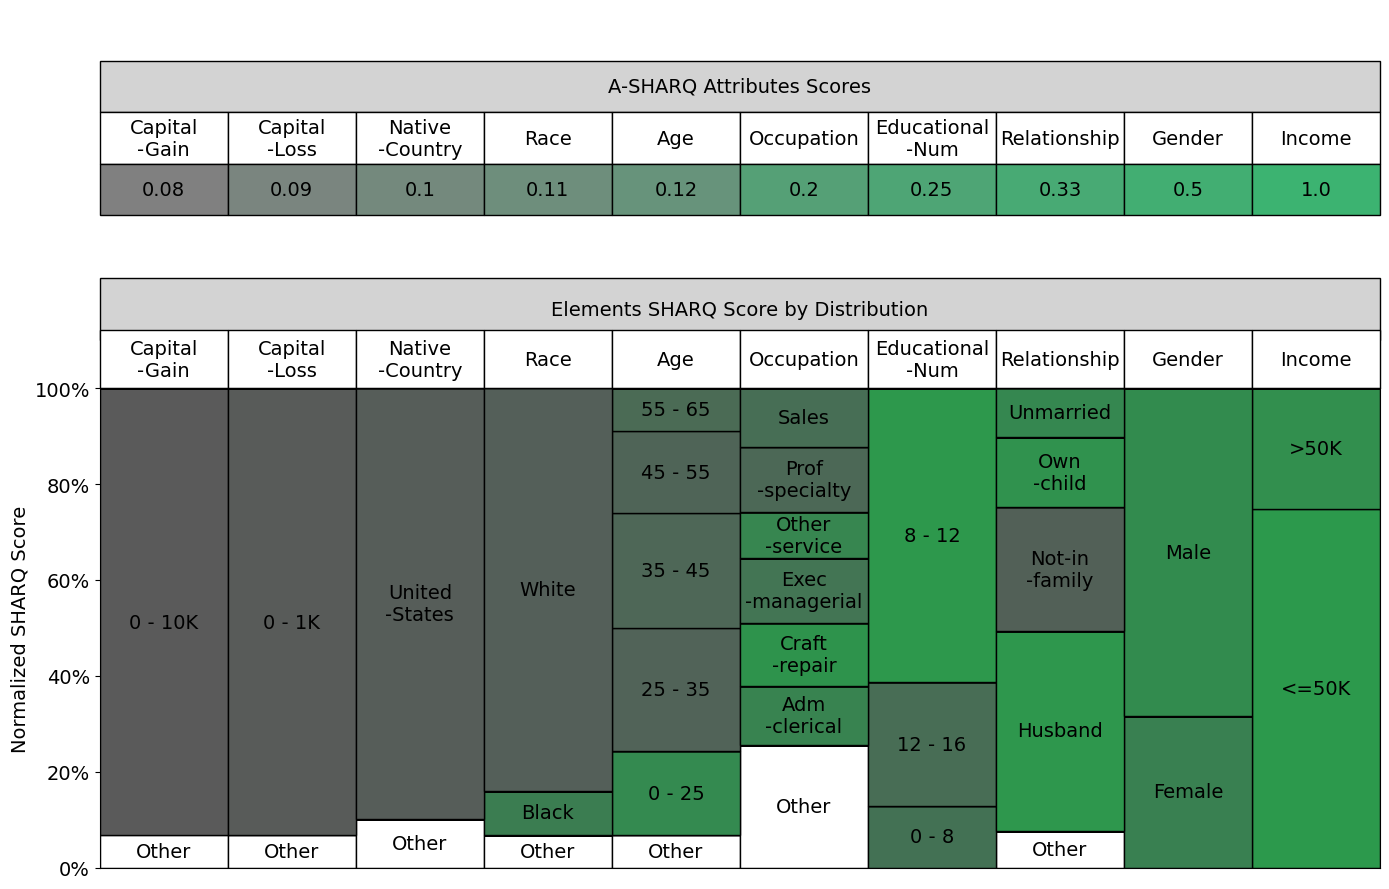

In [38]:
sharq.plt.attributes_heaetmap(verbose=True)

8. Add the SHARQ score to each rule in the rule set. The SHARQ score of a rule is determined by the minimum normalized SHARQ score among the normalized SHARQ scores of the elements that constitute the rule

In [39]:
sharq.add_sharq_score_to_rules_set()
sharq.rules_set

,lhs,rhs,support,lift,score,SHARQ score
0,"['age_(0, 25]']","['educational-num_(8, 12]']",0.124867,1.121001,0.374134,0.062209
1,"['age_(0, 25]']",['income_<=50K'],0.178640,1.315100,0.484695,0.062209
2,['relationship_Own-child'],"['age_(0, 25]']",0.096068,3.628478,0.590407,0.062209
3,"['age_(0, 25]']",['relationship_Own-child'],0.096068,3.628478,0.590407,0.062209
4,"['age_(0, 25]']",['workclass_Private'],0.159086,1.195975,0.436191,0.062209
...,...,...,...,...,...,...
71385,"['educational-num_(8, 12]', 'gender_Male', 'income_<=50K', 'relationship_Husband', 'workclass_Private']","['hours-per-week_(20, 40]', 'native-country_United-States', 'race_White']",0.054091,1.148301,0.249225,0.031862
71386,"['hours-per-week_(20, 40]', 'income_<=50K', 'relationship_Husband', 'workclass_Private']","['educational-num_(8, 12]', 'gender_Male', 'native-country_United-States', 'race_White']",0.054091,1.576701,0.292038,0.031862
71387,"['educational-num_(8, 12]', 'income_<=50K', 'relationship_Husband', 'workclass_Private']","['gender_Male', 'hours-per-week_(20, 40]', 'native-country_United-States', 'race_White']",0.054091,1.725253,0.305485,0.031862
71388,"['educational-num_(8, 12]', 'hours-per-week_(20, 40]', 'relationship_Husband', 'workclass_Private']","['gender_Male', 'income_<=50K', 'native-country_United-States', 'race_White']",0.054091,1.467084,0.281703,0.031862


9. Sort the rules set by lift score (descending) and sharq score (ascending)

In [40]:
sharq.rules_set = sharq.rules_set.sort_values(by=['lift', 'SHARQ score'], ascending=[False, True])
sharq.rules_set

,lhs,rhs,support,lift,score,SHARQ score
23349,"['race_White', 'relationship_Own-child', 'workclass_Private']","['age_(0, 25]', 'income_<=50K', 'native-country_United-States']",0.068544,4.119339,0.531372,0.031862
45128,"['capital-gain_(-1, 10000]', 'race_White', 'relationship_Own-child', 'workclass_Private']","['age_(0, 25]', 'income_<=50K', 'native-country_United-States']",0.068438,4.117250,0.530825,0.008458
45694,"['capital-loss_(-1, 1000]', 'race_White', 'relationship_Own-child', 'workclass_Private']","['age_(0, 25]', 'income_<=50K', 'native-country_United-States']",0.066631,4.116091,0.523699,0.001038
45146,"['race_White', 'relationship_Own-child', 'workclass_Private']","['age_(0, 25]', 'capital-gain_(-1, 10000]', 'income_<=50K', 'native-country_United-States']",0.068438,4.115628,0.530721,0.008458
63691,"['capital-gain_(-1, 10000]', 'capital-loss_(-1, 1000]', 'race_White', 'relationship_Own-child', 'workclass_Private']","['age_(0, 25]', 'income_<=50K', 'native-country_United-States']",0.066525,4.113940,0.523144,0.001038
...,...,...,...,...,...,...
1125,"['age_(0, 25]', 'native-country_United-States']","['capital-gain_(-1, 10000]', 'hours-per-week_(20, 40]']",0.103932,1.050010,0.330348,0.008458
34867,"['capital-gain_(-1, 10000]', 'hours-per-week_(20, 40]', 'workclass_Private']","['educational-num_(8, 12]', 'native-country_United-States', 'race_White']",0.236663,1.050010,0.498496,0.008458
46843,"['age_(25, 35]', 'native-country_United-States', 'race_White', 'workclass_Private']","['capital-gain_(-1, 10000]', 'capital-loss_(-1, 1000]', 'income_<=50K']",0.119447,1.050004,0.354147,-0.054988
28424,"['capital-gain_(-1, 10000]', 'capital-loss_(-1, 1000]', 'educational-num_(8, 12]', 'hours-per-week_(20, 40]', 'occupation_Adm-clerical']",['native-country_United-States'],0.066525,1.050003,0.264294,-0.006979


In [41]:
sharq.rules_set.iloc[[322, 39, 20, 614]]

,lhs,rhs,support,lift,score,SHARQ score
7409,"['relationship_Own-child', 'workclass_Private']","['age_(0, 25]', 'capital-loss_(-1, 1000]', 'race_White']",0.070244,3.811204,0.517413,0.001038
45695,"['capital-loss_(-1, 1000]', 'native-country_United-States', 'relationship_Own-child', 'workclass_Private']","['age_(0, 25]', 'income_<=50K', 'race_White']",0.066631,3.973646,0.514557,0.001038
7819,"['race_White', 'relationship_Own-child', 'workclass_Private']","['age_(0, 25]', 'native-country_United-States']",0.068757,4.063419,0.528571,0.031862
44388,"['age_(0, 25]', 'income_<=50K', 'native-country_United-States', 'workclass_Private']","['capital-gain_(-1, 10000]', 'capital-loss_(-1, 1000]', 'relationship_Own-child']",0.075239,3.732721,0.529950,0.001038
